In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pmdarima
from sklearn.model_selection import train_test_split
from sktime.forecasting.arima import AutoARIMA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [61]:
###we first setup the dataset for the purpose of solving part a
dfog=pd.read_csv("pl.csv")
l=[]
i=0
for j in dfog["vehicle_no"]:
    if type(j)!=str:
        l.append(i)
    i+=1
dfog.drop(l,inplace=True)
dfog.sort_values(by="timestamp")
d=dict()
e=dict()
for x in dfog["timestamp"]:
    if x[:10]=="2024-11-14":
        continue
    elif x[:10]<"2024-11-07":
        d[x[:10]]=0
    else:
        e[x[:10]]=0
for x in dfog["timestamp"]:
    if x[:10]<"2024-11-07":
        d[x[:10]]+=1
    elif x[:10] <"2024-11-14":
        e[x[:10]]+=1
    else:
        e["2024-11-13"]+=1
df_train=pd.DataFrame({"numcars":d.values()})
df_test=pd.DataFrame({"numcars":e.values()})

In [56]:
p_value = sm.tsa.stattools.adfuller(df_train["numcars"])[1]
print(p_value)
####Since the ADF test gives such a small value we can conclude that the dataset is stationary

5.030420282862234e-10


In [57]:
forecaster = AutoARIMA(start_p=2, max_p=6, suppress_warnings=True)
forecaster.fit(df_train["numcars"])
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:                        SARIMAX   Log Likelihood                -350.088
Date:                Sat, 18 Jan 2025   AIC                            704.175
Time:                        16:46:03   BIC                            708.226
Sample:                             0   HQIC                           705.746
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1688.1786     18.893     89.354      0.000    1651.149    1725.209
sigma2      1.576e+04   2452.421      6.426      0.000     1.1e+04    2.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                14.46
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.89
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

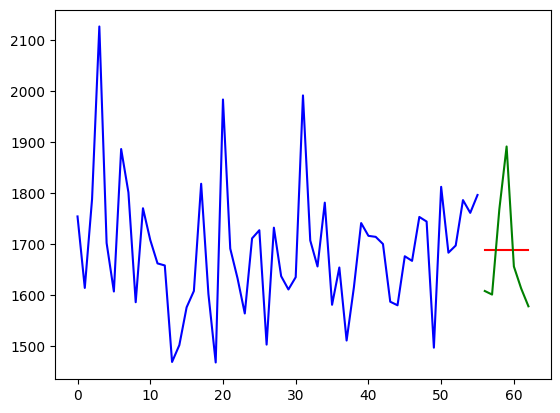

In [59]:
fha = np.arange(len(df_test["numcars"])) + 1
forecast=forecaster.predict(fh=fha)
plt.plot(df_train.index,df_train,color='b',label='train')
plt.plot(forecast.index,forecast,color='r',label='forecast')
plt.plot(df_test.index+len(df_train),df_test,color='g',label='test')
plt.show()

In [58]:
mae = mean_absolute_error(df_test, forecast)
mape = mean_absolute_percentage_error(df_test, forecast)
print("mae:",mae)
print("mape:",mape)

mae: 95.36224489795924
mape: 0.05608285569319597


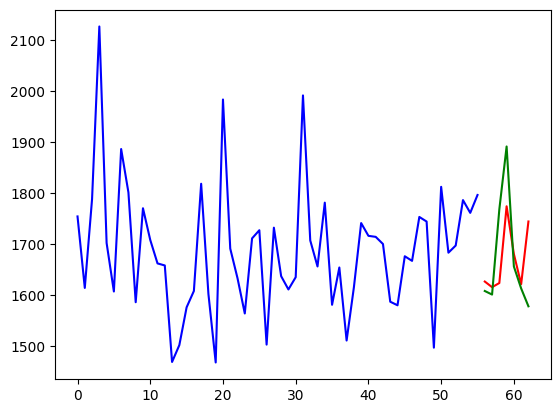

mae: 70.47169677268546
mape: 0.04132853933145456


In [64]:
model=ETSModel(df_train["numcars"],error="add",trend="add",seasonal="add",seasonal_periods=7)
model=model.fit()
forecast=model.forecast(steps=len(df_test["numcars"]))
plt.plot(df_train.index,df_train,color='b',label='train')
plt.plot(forecast.index,forecast,color='r',label='forecast')
plt.plot(df_test.index+len(df_train),df_test,color='g',label='test')
plt.show()
mae = mean_absolute_error(df_test, forecast)
mape = mean_absolute_percentage_error(df_test, forecast)
print("mae:",mae)
print("mape:",mape)